## 2lvl or 3lvl Buck or Buckboost Power Dissipation vs DCM Ton-time

In [ ]:
# use modified cyntec model, which simplifies input parameter dependent variables
# added nxTON DCM calculation

#### to do:
1. verify ciss,coss and crss models vs. datasheet graphs
2. add self heating to mosfets
3. set up jupyter server for public use
4. create gui front end
5. add features to excel export function 

In [1]:
import libs.append_path
from add_python_libraries import *
import pd_filter_fcns

from bucklosses_dcm import Buckconverter_losses

from multiparam_multivar_generic import Multiparam_multivar_df as mp_mv_df

### Input Parameters

In [2]:
input_params = {'vin': 11.4,
                'vout': 4.2,
                'pin': 1.3, #21.5, #30.6,
                'eff': .97, #.95,
                'fs':300e3,
                'ton_mult':1,
                'tambient':25,
                'controller':'raa489300',
                #'r_shunt_input':0.010,
                'lout':{'family':'hbed053t',
                        'value(uH)':0.47,
                        'config':'single'},
                'lvl_config':'3 level',
                'hsfet_partnum':'SIZF5302DT', #'SISH536DN',   #'ISZ0702NLS',#'SIRA74DP',#'SIRA74DP','BSC059N04LS6',#'BSZ063N04LS6',#'SIR426DP',#'SIS488DN',#'SIRA74DP',#'SIS488DN',#'AONS66408',#'AONR66406',#'SIS488DN',#'SISS4410DN',#'SISA14DN',##'SISS4410DN',#'BSC059N04LS6', #'SIS488DN''SIR426DP'
                'lsfet_partnum':'SIZF5300DT',#'SIZF5300DT', #'SISS52DN',   #'BSZ024N04LS6',#'SISA72ADN',#'SISA72ADN',#'AONS66408',#'SISS4410DN',#'SIRA74DP', #'AONS66408',#'BSC059N04LS6',#'BSZ024N04LS6',#'SIRA74DP',
                'q4_partnum':'SHORT', #'SIZF5300DT',#'SHORT',       #'BSC020N03MSG',#'BSC020N03MSG',#'SIRA74DP',#,'AON7318',#'AONR36368',#'AON7318',#'SISA14DN',#'SISA14DN', #'SHORT', #'SISS52DN',
                'vgate':5,
                'rboot':1,
                'm_hs':1,
                'm_ls':1,
                'rd':0.5,
                'caps':{'vin'   :{'partnum':'GRM32EC72A106KE05L','n':4},
                        'vout'  :{'partnum':'GRM32EC72A106KE05L','n':8},
                        'flying':{'partnum':'C2012X5R1H106K125AC','n':8}}
               }
input_params['iout'] = input_params['pin']*input_params['eff']/input_params['vout']

## Results

In [ ]:
fig = make_subplots(
    rows=1,cols=2,
    column_widths=[.27,.73],
    horizontal_spacing = .04,
    specs=[[{"type":"table"},{"type":"bar"}]]
)
fig.add_trace(
    go.Table(
        header = dict(
            values=[' ',' '],
            height=1,
            font=dict(size=30)
        ),
        # header = dict(
        #     values = ['index','value'],
        #     font=dict(size=20),
        #     align="left"
        # ),
        cells = dict(
            values = [idx,val],
            font=dict(size=20),
            height=30,
            align="left"
        )
        
    ),
    
    row=1,col=1
)
fig.add_trace(
    go.Bar(
        x=val_rev,
        orientation='h'
    ),
    row=1,col=2
)
fig.update_layout(
    height=660,
    showlegend=False,
    title_text="Power Loss by Component",
)

fig.show()

In [3]:
input_config = {idx+1:new_params for idx,new_params in enumerate([    
                {'ton_mult':0.5},    
                {'ton_mult':1},
                {'ton_mult':1.5},
                {'ton_mult':2}])}


In [4]:
#iout = range(0,21,3)
iout = np.arange(0,5,0.5).tolist()
iout[0]=0.1
#iout = np.logspace(-1,1,num=100,base=10,endpoint=True).tolist()
var_list = {'param':'iout','values':iout}

In [5]:
df_all = mp_mv_df(Buckconverter_losses,input_params,input_config,var_list)
#df_all = mp_mv_df(input_params,input_config,var_list)


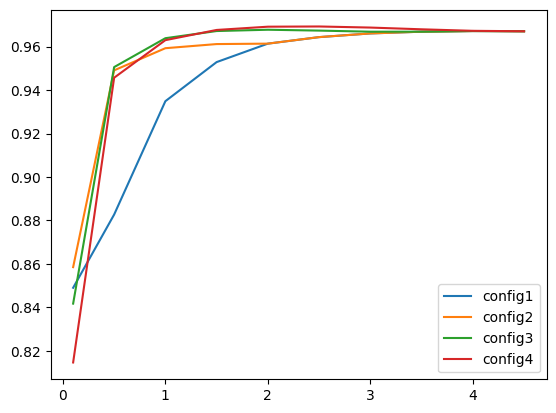

In [6]:
#df_all.df.drop([0],inplace=True)
df_all.parametric_plot('efficiency') #,logx=True)

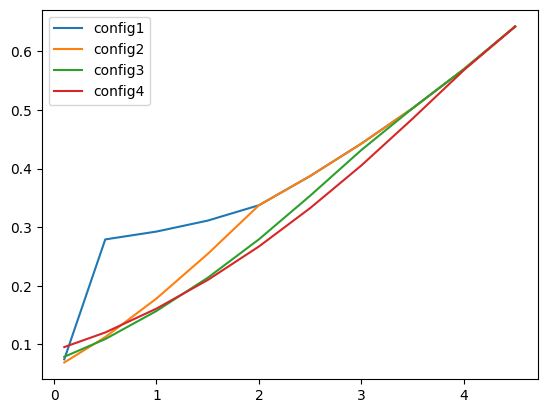

In [7]:
#df_all.df.drop([0],inplace=True)
df_all.parametric_plot('total')#,logx=True)

In [ ]:
df_all.to_csv(r'sim_results\165W_28Vin_10Vout_multipleconfigs_100523.csv')

In [ ]:
df = pd.DataFrame.from_dict(b_loss.p_summary| b_loss.p_totals,orient='index',columns=[b_loss.idc])
df.T